# **Follow Up # 1**

## Done by: Diego Eusse Naranjo
## Identification: 1037655233
## Date: Octubre 11 de 2021

**Asignation:**  In this exercise we extract a circular region of the image lena_gray_512.tif of radious 150. Follow these steps:
 
1. Read the image and convert it to double.
2. Create a matrix of the same dimensions filled with zeros.
3. Modify the above matrix to contain 1′s in a circle of radious 150, i.e. i (j−cx)2+(i−cy)2, where (cx,cy) is the center of the image.
4. Multiply the image by the mask (they are matrices!)
5. Show the result.
 
When multiplying by zero, you set to black the pixels out of the circle.

6. Modify the program to make visible those pixels with half the intensity.

**Hint**
a.shape[0] is the number of rows of a and a.shape[1] the number of columns.




In [1]:
# Importing libraries
from PIL import Image             # Python Imaging Library
import numpy as np                # Numerical Python 
import matplotlib.pyplot as plt   # Python plotting
from urllib.request import urlretrieve
%matplotlib inline

## **Task1:** Read the image and convert it to double.

In [2]:
# Let's download the image to our execution environment
URL = 'https://github.com/diegoeusse/DeepLearning/blob/main/FollowUp1/lena_gray_512.tif?raw=true'

urlretrieve(URL, 'lena_gray_512.tif')

('lena_gray_512.tif', <http.client.HTTPMessage at 0x7fec43daa790>)

Original image


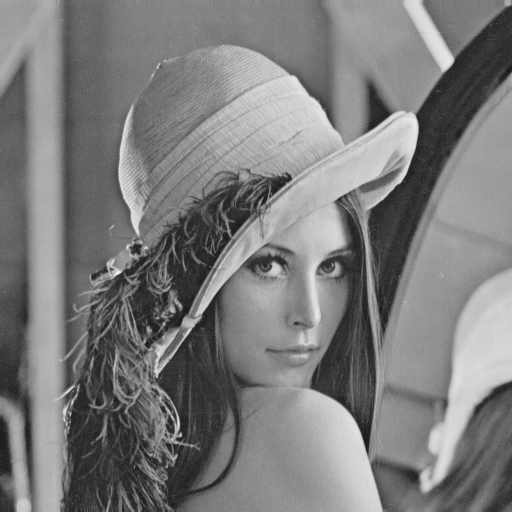

In [3]:
I = Image.open('lena_gray_512.tif')
print('Original image')
I.show()

In [4]:
print('The image resolution is: ' + repr(I.size))

The image resolution is: (512, 512)


In [5]:
# Let's convert the image to an array

imageArray = np.asarray(I)
imageArray

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [6]:
imageArray.shape

(512, 512)

## **Task2:** Create a matrix of the same dimensions filled with zeros.

In [7]:
zeros = np.zeros(I.size)
zeros

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
zeros.shape

(512, 512)

## **Task3:** Modify the above matrix to contain 1′s in a circle of radious 150, i.e. i (j−cx)2+(i−cy)2, where (cx,cy) is the center of the image.

In [9]:
# Let's first find the center of the image:
circle_mask = zeros.copy()
cx = I.size[0]/2
cy = I.size[1]/2
print('The center is: ' + '(' + repr(int(cx)) + ', ' + (repr(int(cy))) + ')' )

The center is: (256, 256)


In [10]:
# The mask is a circle with radius of 150, with center in (cx, cy) ----> (i - cx)**2 + (j - cy)**2 = 150**2
circle_mask = [[1 if (((i - cx)**2 + (j - cy)**2) < 150**2) else 0 for i in range(I.size[0])] for j in range(I.size[1])]
circle_mask = np.array(circle_mask)
circle_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

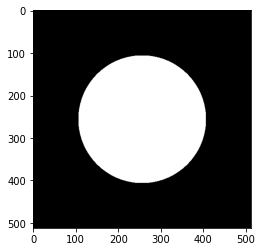

In [11]:
# Let's see the full intensity mask
mask_image = Image.fromarray(np.uint8(circle_mask))
plt.imshow(mask_image, cmap = 'gray')
plt.show(mask_image)

## **Task4:** Multiply the image by the mask (they are matrices!)

In [12]:
result_image = np.multiply(imageArray, circle_mask)
result_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## **Task5:** Show the result.

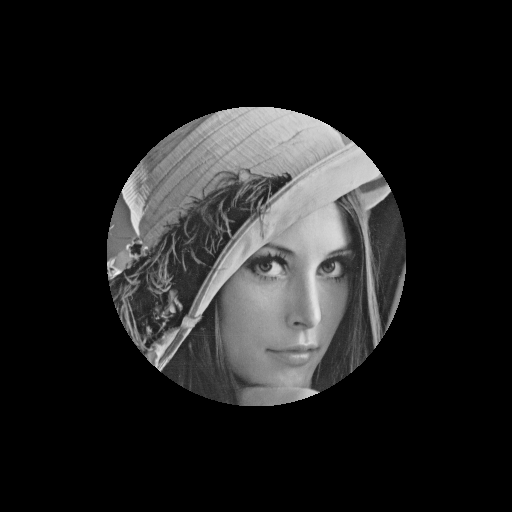

In [13]:
# Let's see the final result
result_image = Image.fromarray(np.uint8(result_image))
result_image.show()

## **Task6:** Modify the program to make visible those pixels with half the intensity.

In [14]:
# The mask is a circle with radius of 150, with center in (cx, cy) ----> (i - cx)**2 + (j - cy)**2 = 150**2
intensity = 0.5
half_intensity_mask = [[1 if (((i - cx)**2 + (j - cy)**2) < 150**2) else intensity for i in range(I.size[0])] for j in range(I.size[1])]
half_intensity_mask = np.array(half_intensity_mask)
half_intensity_mask

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])

In [15]:
half_intensity_image = np.multiply(imageArray, half_intensity_mask)
half_intensity_image

array([[81. , 81. , 81. , ..., 85. , 77.5, 64. ],
       [81. , 81. , 81. , ..., 85. , 77.5, 64. ],
       [81. , 81. , 81. , ..., 85. , 77.5, 64. ],
       ...,
       [21.5, 21.5, 25. , ..., 52. , 50. , 49. ],
       [22. , 22. , 27.5, ..., 52. , 52.5, 54. ],
       [22. , 22. , 27.5, ..., 52. , 52.5, 54. ]])

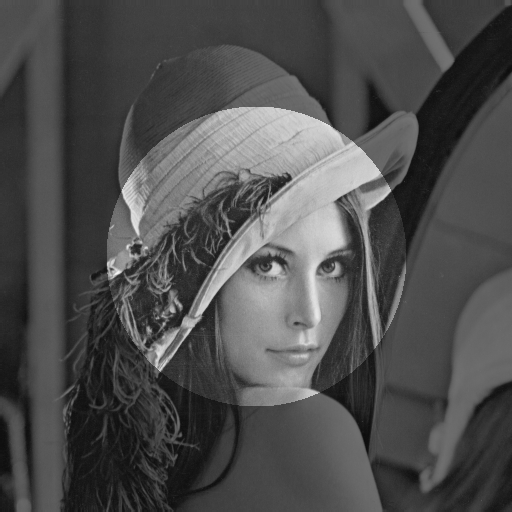

In [16]:
# Let's see the final result
half_intensity_image = Image.fromarray(np.uint8(half_intensity_image))
half_intensity_image.show()